In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
np.random.seed(100)

class Layer:
    def __init__(self, n_input, n_neurons, activation=None, weights=None, bias=None):
        self.weights = weights if weights is not None else np.random.randn(n_input, n_neurons)
        self.activation = activation
        self.bias = bias if bias is not None else np.random.randn(n_neurons)
        self.last_activation = None
        self.error = None
        self.delta = None

    def activate(self, x):
        r = np.dot(x, self.weights) + self.bias
        self.last_activation = self._apply_activation(r)
        return self.last_activation

    def _apply_activation(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return np.tanh(r)
        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-r))
        return r

    def apply_activation_derivative(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return 1 - r ** 2
        if self.activation == 'sigmoid':
            return r * (1 - r)
        return r


class NeuralNetwork:
    def __init__(self):
        self._layers = []

    def add_layer(self, layer):
        self._layers.append(layer)

    def feed_forward(self, X):
        for layer in self._layers:
            X = layer.activate(X)
        return X

    def predict(self, X):
        ff = self.feed_forward(X)
        return ff
        """
        # One row
        if ff.ndim == 1:
            return np.argmax(ff)
        # Multiple rows
        return np.argmax(ff, axis=1)

        """

    def backpropagation(self, X, y, learning_rate):
        output = self.feed_forward(X)
        for i in reversed(range(len(self._layers))):
            layer = self._layers[i]
            if layer == self._layers[-1]:
                layer.error = y - output
                layer.delta = layer.error * layer.apply_activation_derivative(output)
            else:
                next_layer = self._layers[i + 1]
                layer.error = np.dot(next_layer.weights, next_layer.delta)
                layer.delta = layer.error * layer.apply_activation_derivative(layer.last_activation)
        for i in range(len(self._layers)):
            layer = self._layers[i]
            input_to_use = np.atleast_2d(X if i == 0 else self._layers[i - 1].last_activation)
            layer.weights += layer.delta * input_to_use.T * learning_rate

    def train(self, X, y, learning_rate, max_epochs):
        mses = []
        for i in range(max_epochs):
            temp_mses = []
            for j in range(len(X)):
                self.backpropagation(X[j], y[j], learning_rate)
                mse = np.mean(np.square(y - nn.feed_forward(X)))
                temp_mses.append(mse)
            mses.append(sum(temp_mses) / len(temp_mses))
            print('Epoch: #%s, MSE: %f' % (i+1, float(mse)))
        return mses

In [7]:
dataset = pd.read_csv('/content/xor.csv')
dataset

,Input_1,Input_2,output
0,1,0,1
1,1,1,0
2,0,0,0
3,0,1,1


In [8]:
x = []
y = []
for i in range(len(dataset["output"])):
    x.append([
        dataset["Input_1"][i],
        dataset["Input_2"][i],
    ])
    y.append([dataset["output"][i]])

x = np.array(x)
y = np.array(y)

In [10]:
nn = NeuralNetwork()
nn.add_layer(Layer(2, 10, 'sigmoid'))
nn.add_layer(Layer(10, 1, 'sigmoid'))
errors = nn.train(x, y, 0.75, 500)

Epoch: #1, MSE: 0.269047
Epoch: #2, MSE: 0.267285
Epoch: #3, MSE: 0.265959
Epoch: #4, MSE: 0.264880
Epoch: #5, MSE: 0.263939
Epoch: #6, MSE: 0.263079
Epoch: #7, MSE: 0.262266
Epoch: #8, MSE: 0.261483
Epoch: #9, MSE: 0.260720
Epoch: #10, MSE: 0.259972
Epoch: #11, MSE: 0.259235
Epoch: #12, MSE: 0.258508
Epoch: #13, MSE: 0.257790
Epoch: #14, MSE: 0.257080
Epoch: #15, MSE: 0.256378
Epoch: #16, MSE: 0.255683
Epoch: #17, MSE: 0.254995
Epoch: #18, MSE: 0.254314
Epoch: #19, MSE: 0.253639
Epoch: #20, MSE: 0.252969
Epoch: #21, MSE: 0.252305
Epoch: #22, MSE: 0.251646
Epoch: #23, MSE: 0.250991
Epoch: #24, MSE: 0.250341
Epoch: #25, MSE: 0.249694
Epoch: #26, MSE: 0.249051
Epoch: #27, MSE: 0.248410
Epoch: #28, MSE: 0.247773
Epoch: #29, MSE: 0.247137
Epoch: #30, MSE: 0.246503
Epoch: #31, MSE: 0.245871
Epoch: #32, MSE: 0.245239
Epoch: #33, MSE: 0.244609
Epoch: #34, MSE: 0.243978
Epoch: #35, MSE: 0.243348
Epoch: #36, MSE: 0.242717
Epoch: #37, MSE: 0.242085
Epoch: #38, MSE: 0.241452
Epoch: #39, MSE: 0.24

In [11]:
print("Predicted output train: \n" + str(nn.predict(x)))
print("Predicted output test: \n" + str(nn.predict([[5, 100], [50, 40]])))

Predicted output train: 
[[0.90303656]
 [0.11448256]
 [0.1140275 ]
 [0.87855344]]
Predicted output test: 
[[0.94925483]
 [0.02269094]]


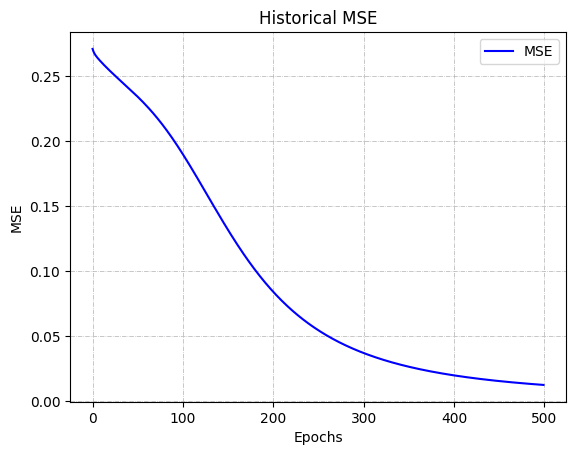

In [12]:
plt.plot(errors, c = 'b', label = 'MSE')
plt.title('Historical MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.grid(linestyle='-.', linewidth=0.5)
plt.legend()
plt.show()